In [50]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
from nltk import pos_tag, word_tokenize
from nltk.tokenize import sent_tokenize
import string

In [51]:
# load messi data into single string
messi_file_path = 'data/messi.json'

with open(messi_file_path, 'r') as file:
    messidata = json.load(file)

messitotalstring = ' '.join(messidata)

soup = BeautifulSoup(messitotalstring, 'html.parser')

p_tags = soup.find_all('p')

messistring=''
for tag in p_tags:
    messistring+=tag.get_text()+' '

messistring = re.sub("\n", " ", messistring)
messistring = re.sub("\s+", " ", messistring)
messistring = re.sub("\[.*?\]", " ", messistring)

In [52]:
# load trout data into single string
trout_file_path = 'data/trout.json'

with open(trout_file_path, 'r') as file:
    troutdata = json.load(file)

trouttotalstring = ' '.join(troutdata)

soup = BeautifulSoup(trouttotalstring, 'html.parser')

p_tags = soup.find_all('p')

troutstring=''
for tag in p_tags:
    troutstring+=tag.get_text()+' '

troutstring = re.sub("\n", " ", troutstring)
troutstring = re.sub("\s+", " ", troutstring)
troutstring = re.sub("\[.*?\]", " ", troutstring)

In [53]:
# load lebron data into single string
lebron_file_path = 'data/lebron.json'

with open(lebron_file_path, 'r') as file:
    lebrondata = json.load(file)

lebrontotalstring = ' '.join(lebrondata)

soup = BeautifulSoup(lebrontotalstring, 'html.parser')

p_tags = soup.find_all('p')

lebronstring=''
for tag in p_tags:
    lebronstring+=tag.get_text()+' '

lebronstring = re.sub("\n", " ", lebronstring)
lebronstring = re.sub("\s+", " ", lebronstring)
lebronstring = re.sub("\[.*?\]", " ", lebronstring)

In [54]:
# load mahomes data into single string
mahomes_file_path = 'data/mahomes.json'

with open(mahomes_file_path, 'r') as file:
    mahomesdata = json.load(file)

mahomestotalstring = ' '.join(mahomesdata)

soup = BeautifulSoup(mahomestotalstring, 'html.parser')

p_tags = soup.find_all('p')

mahomesstring=''
for tag in p_tags:
    mahomesstring+=tag.get_text()+' '

mahomesstring = re.sub("\n", " ", mahomesstring)
mahomesstring = re.sub("\s+", " ", mahomesstring)
mahomesstring = re.sub("\[.*?\]", " ", mahomesstring)

In [55]:
# load crosby data into single string
crosby_file_path = 'data/crosby.json'

with open(crosby_file_path, 'r') as file:
    crosbydata = json.load(file)

crosbytotalstring = ' '.join(crosbydata)

soup = BeautifulSoup(crosbytotalstring, 'html.parser')

p_tags = soup.find_all('p')

crosbystring=''
for tag in p_tags:
    crosbystring+=tag.get_text()+' '

crosbystring = re.sub("\n", " ", crosbystring)
crosbystring = re.sub("\s+", " ", crosbystring)
crosbystring = re.sub("\[.*?\]", " ", crosbystring)

In [56]:
# # getting parts of speech from sentences
# datas = [messistring, troutstring, lebronstring, mahomesstring, crosbystring]

# parts_of_speech = []

# for text in datas: 
#     temp = sent_tokenize(text)
#     for x in temp:
#         parts_of_speech += pos_tag(word_tokenize(x))

# # turn the list of parts of speech to a dictionary
# parts_of_speech = list(set(parts_of_speech))
# pos_dict = {key: value for key, value in parts_of_speech}

# # converting the parts of speech into a form that can be used by the lemmatizer
# for key, value in pos_dict.items():
#     if value.startswith('J'):
#         pos_dict[key] = 'a'
#     elif value.startswith('V'):
#         pos_dict[key] = 'v'
#     elif value.startswith('N'):
#         pos_dict[key] = 'n'
#     elif value.startswith('R'):
#         pos_dict[key] = 'r'
#     else:
#         pos_dict[key] = 'n'

In [57]:
messitokens = nltk.word_tokenize(messistring)
lebrontokens = nltk.word_tokenize(lebronstring)
trouttokens = nltk.word_tokenize(troutstring)
mahomestokens = nltk.word_tokenize(mahomesstring)
crosbytokens = nltk.word_tokenize(crosbystring)

In [58]:
print('Length of Messi Tokens:', len(messitokens))
print('Length of Lebron Tokens:', len(lebrontokens))
print('Length of Trout Tokens:', len(trouttokens))
print('Length of Mahomes Tokens:', len(mahomestokens))
print('Length of Crosby Tokens:', len(crosbytokens))

total = len(messitokens)+len(lebrontokens)+len(trouttokens)+len(mahomestokens)+len(crosbytokens)
print('Length of All Tokens:', total)

Length of Messi Tokens: 233859
Length of Lebron Tokens: 60436
Length of Trout Tokens: 95202
Length of Mahomes Tokens: 120626
Length of Crosby Tokens: 23956
Length of All Tokens: 534079


In [59]:
# compiling list of stopwords

punctuation_stop_list = string.punctuation

# originial list of stop words
stoplist = stopwords.words("english")

# adding more stop words
stoplist.extend([
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", 
    "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", 
    "can't", "cannot", "could", "couldn't", 
    "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", 
    "each", 
    "few", "for", "from", "further", 
    "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", 
    "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", 
    "let's", 
    "me", "more", "most", "mustn't", "my", "myself", 
    "no", "nor", "not", 
    "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves",
    ".", ","
])

# adding punctuation
stoplist.extend(punctuation_stop_list)

# adding more punctuation
stoplist.extend(["''", '``'])

stopwords = set(stoplist)

In [68]:
# implement lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# messi_lemmatized = [lemmatizer.lemmatize(w, pos_dict[w]) for w in messitokens]
# lebron_lemmatized = [lemmatizer.lemmatize(w, pos_dict[w]) for w in lebrontokens]
# mahomes_lemmatized = [lemmatizer.lemmatize(w, pos_dict[w]) for w in mahomestokens]
# crosby_lemmatized = [lemmatizer.lemmatize(w, pos_dict[w]) for w in crosbytokens]
# trout_lemmatized = [lemmatizer.lemmatize(w, pos_dict[w]) for w in trouttokens]

messi_lemmatized = [lemmatizer.lemmatize(w) for w in messitokens]
lebron_lemmatized = [lemmatizer.lemmatize(w) for w in lebrontokens]
mahomes_lemmatized = [lemmatizer.lemmatize(w) for w in mahomestokens]
crosby_lemmatized = [lemmatizer.lemmatize(w) for w in crosbytokens]
trout_lemmatized = [lemmatizer.lemmatize(w) for w in trouttokens]

messi_nostopwords = [w for w in messitokens if w not in stopwords]
lebron_nostopwords = [w for w in lebrontokens if w not in stopwords]
mahomes_nostopwords = [w for w in mahomestokens if w not in stopwords]
crosby_nostopwords = [w for w in crosbytokens if w not in stopwords]
trout_nostopwords = [w for w in trouttokens if w not in stopwords]

Messi Word Cloud

Frequency Distribution
[('the', 10912), (',', 10487), ('.', 8650), ('a', 5492), ('to', 5284), ('in', 4955), ('and', 4310), ('of', 3879), ("'s", 3353), ('Messi', 2523), ('for', 2167), ('on', 2124), ('that', 2092), ('``', 1964), ('with', 1798), ("''", 1779), ('Miami', 1778), ('he', 1749), ('is', 1741), ('his', 1564)]
 


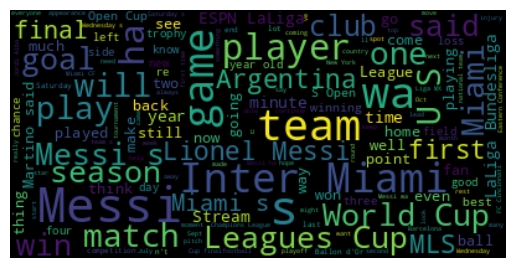

Lebron Word Cloud

Frequency Distribution
[('the', 3015), (',', 2619), ('.', 2431), ('to', 1463), ('a', 1432), ('in', 1244), ('and', 1191), ('of', 981), ("'s", 634), ('his', 615), ('James', 507), ('with', 504), ('``', 497), ('for', 488), ("''", 468), ('that', 466), ('he', 451), ('on', 430), ('I', 430), ('wa', 392)]
 


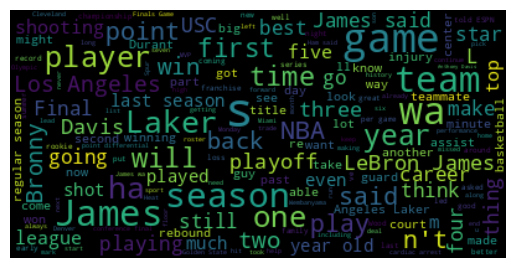

Mahomes Word Cloud

Frequency Distribution
[('the', 5517), (',', 5433), ('.', 5136), ('a', 3031), ('to', 2510), ('in', 2404), ('and', 2348), ('of', 1828), ("'s", 1355), ('for', 1107), ('he', 1012), ('is', 943), ('that', 924), ('with', 886), ('his', 825), ('(', 795), (')', 795), ('on', 763), ('season', 736), ('I', 704)]
 


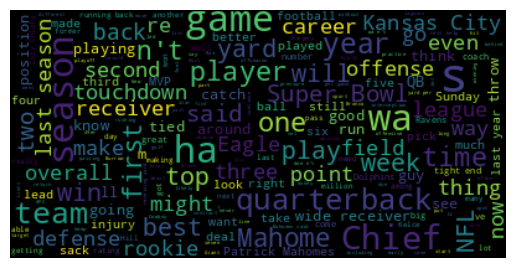

Crosby Word Cloud

Frequency Distribution
[('.', 1107), ('the', 1068), (',', 1013), ('a', 551), ('to', 531), ('in', 467), ('and', 442), ('of', 381), ("'s", 317), ('for', 225), ('``', 216), ("''", 211), ('wa', 205), ('that', 204), ('with', 203), ('he', 199), ('his', 199), ('Crosby', 187), ('I', 174), ('on', 172)]
 


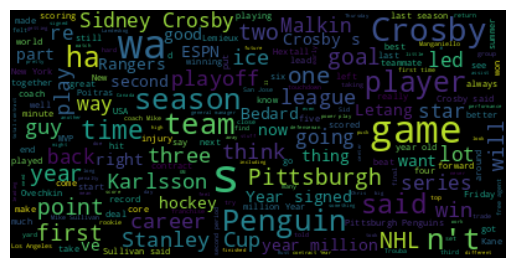

Trout Word Cloud

Frequency Distribution
[(',', 4573), ('the', 4156), ('.', 3830), ('a', 2303), ('in', 1919), ('and', 1838), ('to', 1827), ('of', 1534), ("'s", 1132), ('he', 944), ('his', 856), ('for', 746), ('that', 696), ('with', 694), ('is', 686), ('on', 646), (':', 627), ('Trout', 560), ('season', 534), ('wa', 515)]
 


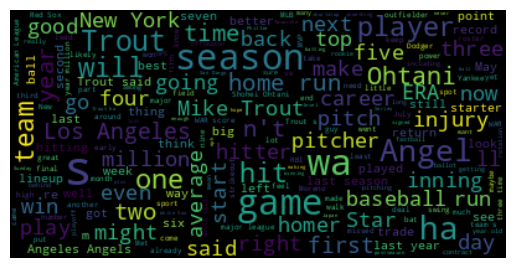

In [65]:
# building word clouds w stopwords

print('Messi Word Cloud')

fdist = nltk.FreqDist(messi_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

messitext = " ".join(messi_lemmatized)                                                                                                                                                                
wordcloud = WordCloud(max_font_size=40).generate(messitext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/messi.png')
plt.show()

print('Lebron Word Cloud')

fdist = nltk.FreqDist(lebron_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

lebrontext = " ".join(lebron_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(lebrontext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/lebron.png')
plt.show()

print('Mahomes Word Cloud')

fdist = nltk.FreqDist(mahomes_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

mahomestext = " ".join(mahomes_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(mahomestext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/mahomes.png')
plt.show()

print('Crosby Word Cloud')

fdist = nltk.FreqDist(crosby_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

crosbytext = " ".join(crosby_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(crosbytext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/crosby.png')
plt.show()

print('Trout Word Cloud')

fdist = nltk.FreqDist(trout_lemmatized)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

trouttext = " ".join(trout_lemmatized)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(trouttext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/trout.png')
plt.show()

Messi Word Cloud

Frequency Distribution
[("'s", 3353), ('Messi', 2523), ('Miami', 1778), ('I', 1175), ('Cup', 1131), ('team', 988), ('The', 956), ('said', 943), ('Inter', 864), ('--', 840), ('MLS', 771), ('game', 737), ("n't", 730), ('season', 618), ('first', 581), ('play', 548), ('Argentina', 530), ('one', 514), ('It', 490), ('games', 482)]
 


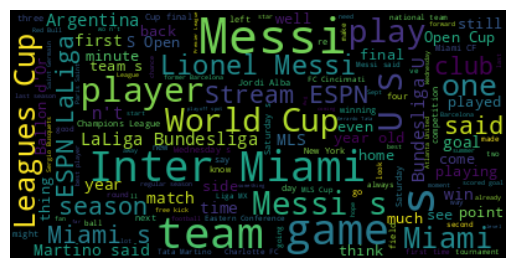

Lebron Word Cloud

Frequency Distribution
[("'s", 634), ('James', 507), ('I', 430), ('season', 329), ('Lakers', 281), ('--', 279), ('The', 255), ('said', 244), ('team', 230), ("n't", 213), ('game', 195), ('NBA', 173), ('first', 169), ('games', 160), ('He', 153), ('points', 145), ('one', 140), ('last', 118), ('Davis', 116), ('LeBron', 113)]
 


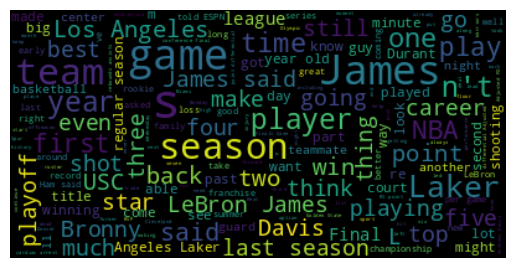

Mahomes Word Cloud

Frequency Distribution
[("'s", 1355), ('I', 704), ('season', 602), ('The', 591), ("n't", 507), ('Chiefs', 487), ('Mahomes', 465), ('He', 435), ('--', 421), ('game', 403), ('yards', 354), ('NFL', 329), ('year', 310), ('said', 309), ('first', 297), ('last', 278), ('quarterback', 266), ('one', 263), ('two', 249), ('team', 246)]
 


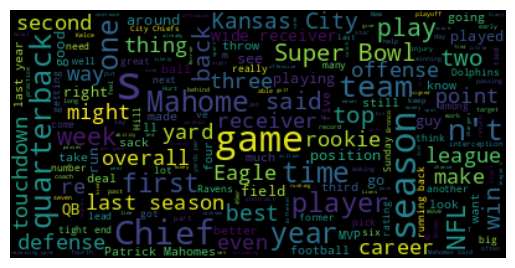

Crosby Word Cloud

Frequency Distribution
[("'s", 317), ('Crosby', 187), ('I', 174), ('The', 133), ('Penguins', 124), ('said', 119), ("n't", 109), ('season', 102), ('He', 81), ('team', 80), ('game', 78), ('--', 75), ('first', 72), ('Pittsburgh', 69), ('years', 65), ('time', 62), ('NHL', 59), ('games', 56), ('one', 52), ('Karlsson', 50)]
 


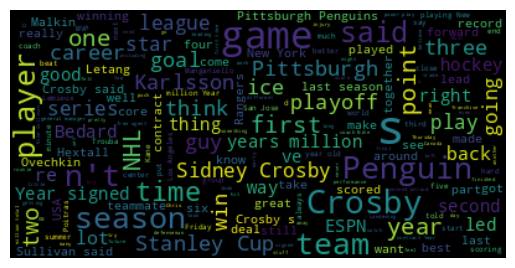

Trout Word Cloud

Frequency Distribution
[("'s", 1132), ('Trout', 560), ('The', 503), ('--', 489), ('I', 463), ('season', 441), ('Angels', 436), ('He', 375), ("n't", 358), ('said', 303), ('Ohtani', 262), ('games', 233), ('first', 230), ('one', 222), ('runs', 199), ('last', 199), ('It', 196), ('team', 194), ('game', 188), ('two', 181)]
 


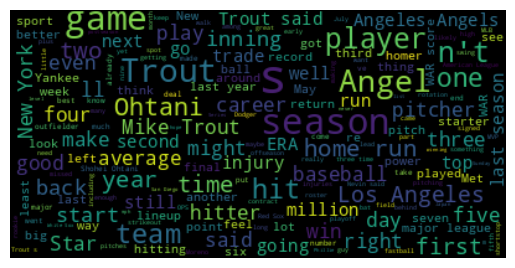

In [69]:
# building word clouds w/0 stopwords

print('Messi Word Cloud')

fdist = nltk.FreqDist(messi_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

messitext = " ".join(messi_nostopwords)                                                                                                                                                                
wordcloud = WordCloud(max_font_size=40).generate(messitext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/messi.png')
plt.show()

print('Lebron Word Cloud')

fdist = nltk.FreqDist(lebron_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

lebrontext = " ".join(lebron_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(lebrontext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/lebron.png')
plt.show()

print('Mahomes Word Cloud')

fdist = nltk.FreqDist(mahomes_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

mahomestext = " ".join(mahomes_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(mahomestext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/mahomes.png')
plt.show()

print('Crosby Word Cloud')

fdist = nltk.FreqDist(crosby_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

crosbytext = " ".join(crosby_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(crosbytext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/crosby.png')
plt.show()

print('Trout Word Cloud')

fdist = nltk.FreqDist(trout_nostopwords)
print("\nFrequency Distribution")
print(fdist.most_common(20))
print(" ")

trouttext = " ".join(trout_nostopwords)                                                                                                                                                             
wordcloud = WordCloud(max_font_size=40).generate(trouttext)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.savefig('img/trout.png')
plt.show()

In [70]:
def print_common_bigrams(tokenlist):
    
    bigrams = nltk.ngrams(tokenlist, 2)
    bigramlist = list(bigrams)
    
    # print out most frequent bigrams
    bigramfreq = nltk.FreqDist(bigramlist)
    top10bigrams = bigramfreq.most_common(10)
    top50bigrams = bigramfreq.most_common(50)

    # part a)
    print('** Most frequent bigrams **')
    for x in top10bigrams:
        print(x[0][0], x[0][1])

    
    # part b)
    print('\n** Most frequent bigrams with no stop words **')
    for x in top50bigrams:
        if x[0][0].lower() not in stoplist and x[0][1].lower() not in stoplist:
            print(x[0][0], x[0][1])


print('Messi Bigrams')
print_common_bigrams(messi_lemmatized)
print('\nLebron Bigrams')
print_common_bigrams(lebron_lemmatized)
print('\nTrout Bigrams')
print_common_bigrams(trout_lemmatized)
print('\nCrosby Bigrams')
print_common_bigrams(crosby_lemmatized)
print('\nMahomes Bigrams')
print_common_bigrams(mahomes_lemmatized)

Messi Bigrams
** Most frequent bigrams **
in the
. ``
of the
Inter Miami
, ''
, and
. ''
. The
, but
for the

** Most frequent bigrams with no stop words **
Inter Miami
Messi 's
World Cup
Leagues Cup
Lionel Messi
Miami 's

Lebron Bigrams
** Most frequent bigrams **
in the
. ``
of the
, ''
. ''
. The
to the
, and
the Lakers
on the

** Most frequent bigrams with no stop words **
LeBron James
Los Angeles
James said

Trout Bigrams
** Most frequent bigrams **
in the
of the
. The
. ``
. He
, but
, and
for the
the Angels
. ''

** Most frequent bigrams with no stop words **
home run
Los Angeles
Mike Trout

Crosby Bigrams
** Most frequent bigrams **
. ``
of the
in the
. The
. ''
, ''
, and
the Penguins
. He
said .

** Most frequent bigrams with no stop words **
Stanley Cup
Sidney Crosby
Year signed

Mahomes Bigrams
** Most frequent bigrams **
in the
of the
. ``
. The
, but
, and
. He
. ''
for the
, ''

** Most frequent bigrams with no stop words **
Super Bowl
Kansas City
last season


In [71]:
# import statement
from nltk.collocations import *

# Create the object you need to get collocations.
bigram_measures = nltk.collocations.BigramAssocMeasures()

def print_collocations(tokenlist):

    finder = BigramCollocationFinder.from_words(tokenlist)
    finder.apply_freq_filter(2)
    print('** Common Collocations **')
    for c in finder.nbest(bigram_measures.pmi, 10):
        print(" ".join(c))

print('Messi Collocations')
print_collocations(messi_lemmatized)
print('\nLebron Collocations')
print_collocations(lebron_lemmatized)
print('\nTrout Collocations')
print_collocations(trout_lemmatized)
print('\nCrosby Collocations')
print_collocations(crosby_lemmatized)
print('\nMahomes Collocations')
print_collocations(mahomes_lemmatized)

Messi Collocations
** Common Collocations **
Groupe Amaury
Marius Bulter
Michel Platini
Talles Magno
Trent Alexander-Arnold
Warren Zaire-Emery
button-up collar
cuatro grandes
'Hot Lips
'People immigrate

Lebron Collocations
** Common Collocations **
Alperen Sengun
Bad Bunny
Buffalo Bills
Hakeem Olajuwon
Home Court
Jason Kidd
Kentavious Caldwell-Pope
Lisa Leslie
Madison Square
McAfee Show

Trout Collocations
** Common Collocations **
Bryson Stott
Bud Selig
Carolina Reaper
Cedric Mullins
Charles Barkley
Edward Auctions
Eyes emoji
Framber Valdez
Kendrys Morales
Kodai Senga

Crosby Collocations
** Common Collocations **
Conn Smythe
Dallas Stars
Greg Wyshynski
Kasperi Kapanen
Las Vegas
Nathan MacKinnon
Opening Day
Toby Gerhart
Vancouver Canucks
cartilage transplant

Mahomes Collocations
** Common Collocations **
40-yard dash
Dresser Winn
Edmonton Oilers
Foyesade Oluokun
Free Agent
J.K. Dobbins
Jameis Winston
Khalil Mack
Lauren Holiday
Lionel Messi
